In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

%matplotlib inline

In [2]:
import cartopy
import cartopy.crs as ccrs  # import the coordinate refernce system
import cartopy.io.img_tiles as cimgt  # this is for calling map tiles from mapbox

mapbox = cimgt.MapboxStyleTiles(
    "pk.eyJ1IjoiamVzc2VwaXNlbCIsImEiOiJjanN3MG43Z2wwNmFoNDNzMTJncDdqMDV0In0.LCWlSCTZwv2j-9V5o1egWw",
    "jessepisel",
    "cjnlyd3ll0qh42smrrbe8q8c4",
)
# this creates a mapbox object that has an access token, username, and a mapID, this is the basemap we are going to use underneath our plot

In [73]:
data = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\nure.csv",
    parse_dates=["sampdat"],
)
data["stype"] = "sediment"

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
d2 = data[["latitude", "longitude", "sampdat", "stype"]]

In [82]:
import glob

ref = pd.read_csv(
    r"J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\tblRockGeoData.csv",
    index_col=[0],
    parse_dates=["date_sub"],
)
path = r"J:\\Geology\\WSGS\\Projects\\Critical Minerals\\ngdbrock-fUS56\\ngdbrock-fUS56\\"
allFiles = glob.glob(path + "*.csv")
analysis = pd.DataFrame
moving = []
for file in allFiles:
    types = pd.read_csv(file)
    moving.append(types)
analysis = pd.concat(moving, sort=False)


merged = ref.merge(analysis, on="lab_id")
merged.drop(
    columns=["br_ppm", "ir_ppm", "rn_ppm", "i_ppm", "ir_ppb", "au_ppb"],
    inplace=True,
)
merged["tracking"] = np.arange(0, len(merged))
merged["stype"] = "rock"
merged["sampdat"] = merged["date_sub"]

In [83]:
m2 = merged[["latitude", "longitude", "sampdat", "stype"]]

In [84]:
sed_rock = pd.concat([m2, d2])

In [92]:
merged["sampdat"].min()

Timestamp('1964-04-07 00:00:00')

In [139]:
datelist[90]

Timestamp('1980-04-17 05:28:35.436241664')

In [181]:
datelist = pd.date_range(
    "1965-10-20 00:00:00", "1985-10-20 00:00:00", periods=150
).tolist()

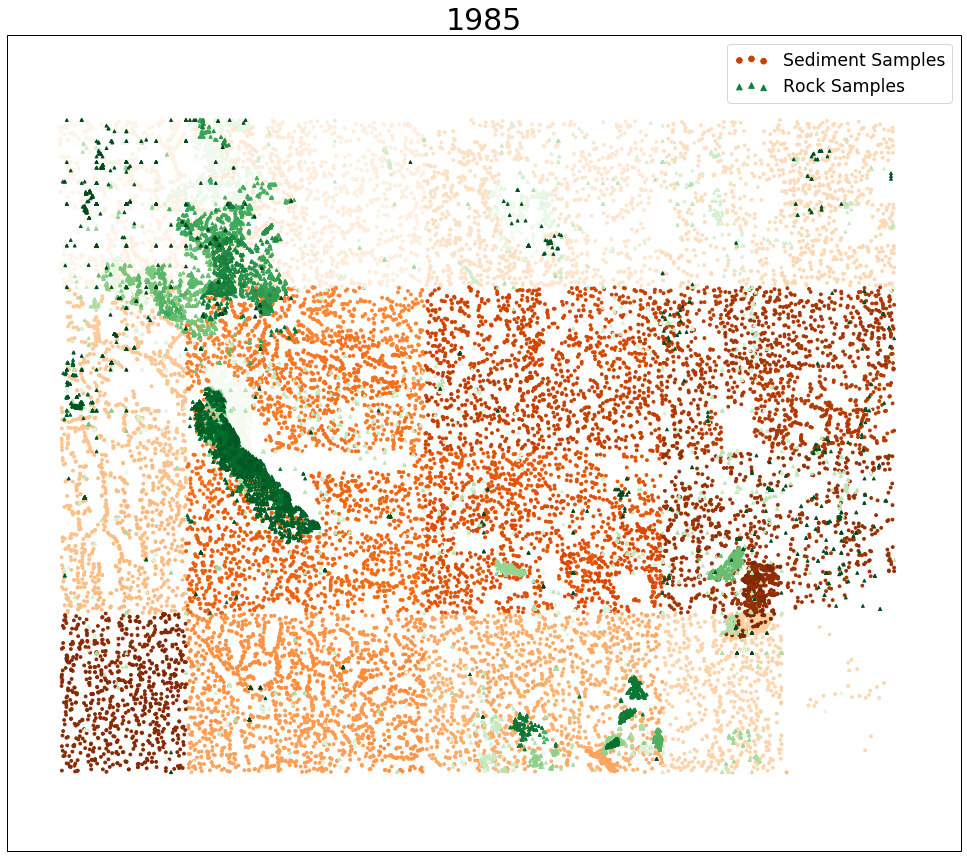

In [189]:
sed = sed_rock[
    (sed_rock["sampdat"] <= datelist[i]) & (sed_rock["stype"] == "sediment")
]
rock = sed_rock[
    (sed_rock["sampdat"] <= datelist[i]) & (sed_rock["stype"] == "rock")
]
fig = plt.figure(figsize=(20, 15))  # I like bigger figures
ax = plt.axes(
    projection=mapbox.crs
)  # this sets our plot axes to the mapbox coordinate reference system
ax.set_extent([-103.5, -111.5, 40.5, 45.5])
# ax.add_image(mapbox, 7)
s = plt.scatter(
    sed["longitude"],
    sed["latitude"],
    c=range(len(sed)),
    s=8,
    transform=ccrs.Geodetic(),
    marker="o",
    cmap="Oranges",
)
r = plt.scatter(
    rock["longitude"],
    rock["latitude"],
    c=range(len(rock)),
    s=8,
    transform=ccrs.Geodetic(),
    marker="^",
    cmap="Greens",
)
plt.title(datelist[i].strftime("%Y"), fontsize=30)
plt.legend(
    (s, r),
    ("Sediment Samples", "Rock Samples"),
    fontsize="xx-large",
    scatterpoints=3,
    markerscale=2,
)
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[0].set_color(plt.cm.Oranges(0.8))
legend.legendHandles[1].set_color(plt.cm.Greens(0.8))

In [183]:
from IPython import display

for i in range(0, len(datelist)):
    plt.clf()
    sed = sed_rock[
        (sed_rock["sampdat"] <= datelist[i])
        & (sed_rock["stype"] == "sediment")
    ]
    rock = sed_rock[
        (sed_rock["sampdat"] <= datelist[i]) & (sed_rock["stype"] == "rock")
    ]
    fig = plt.figure(figsize=(20, 15))  # I like bigger figures
    ax = plt.axes(
        projection=mapbox.crs
    )  # this sets our plot axes to the mapbox coordinate reference system
    ax.set_extent([-103.5, -111.5, 40.5, 45.5])
    ax.add_image(mapbox, 7)
    s = plt.scatter(
        sed["longitude"],
        sed["latitude"],
        c=range(len(sed)),
        s=8,
        transform=ccrs.Geodetic(),
        marker="o",
        cmap="Oranges",
    )
    r = plt.scatter(
        rock["longitude"],
        rock["latitude"],
        c=range(len(rock)),
        s=8,
        transform=ccrs.Geodetic(),
        marker="^",
        cmap="Greens",
    )
    plt.title(datelist[i].strftime("%Y"), fontsize=30)
    plt.legend(
        (s, r),
        ("Sediment Samples", "Rock Samples"),
        fontsize="xx-large",
        scatterpoints=3,
        markerscale=2,
    )
    ax = plt.gca()
    legend = ax.get_legend()
    legend.legendHandles[0].set_color(plt.cm.Oranges(0.8))
    legend.legendHandles[1].set_color(plt.cm.Greens(0.8))
    plt.savefig("D:/jupyter/critical minerals/animation/" + str(i) + ".jpg")
    plt.close()

<Figure size 432x288 with 0 Axes>